# Project 10 - Chapter 8 Advanced Data Analysis

In the last few chapters, we have become comfortable with the idea of building our own functions. These can become quite complex, as we have learned with the construction of the OLS regression in chapter 7. We will continue developing our tool set for working with and managing large sets of data by integrating data from different data sets. We will introduce the multi index to facilitate this process. Among other things, the multi index is useful for including identifiers across time and region or principality. We will also use the multi index to perform a panel regression that controls for level effects between different countries.

## Using a Double Index to Work with Panel Data

In any project, it will not be uncommon for data to be attached to more than one indentifying category. Often, data will be labeled by polity and by date. In the next several examples, we will work with multiple data sets of this sort, working to combine different data sets, investigate the features of the double index, and use this data in a panel regression that can control for effects by polity and by time period.

### Plotting with Double Index

We will be working with two datasets in the next example: the Fraser Economic Freedom Index and GDP from the Maddison Project.

Due to the formatting of the Fraser Economic Freedom Index, the first column and the first three rows of data in the sheet titled “EFW Index 2018 Report” are blank. We will account for this when importing the data with pandas. Both should be saved in the same folder as the script below.

First, import the GDP data from Maddison Project:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                     index_col = ["ISO_Code_3", "Year"],
                     parse_dates = True).rename(columns = {"Summary":"EFW"})
data
                 

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
AGO        1970-01-01         AO  Sub-Saharan Africa   
           1975-01-01         AO  Sub-Saharan Africa   
           1980-01-01         AO  Sub-Saharan Africa   
           1985-01-01         AO  Sub-Saharan Africa   
           1990-01-01         AO  Sub-Saharan Africa   
...                          ...                 ...   
ZWE        2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   
           2019-01-01         ZW  Sub-Saharan Africa   
           2020-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
AGO        1970-01-01                                                NaN                                                                                     
           1975-01-01                                                NaN                                                                                     
           1980-01-01                                                NaN                                                                                     
           1985-01-01                                                NaN                                                                                     
           1990-01-01                                                 LM                                                                                     
...                                                                  ...                                                                                     
ZWE        2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     
           2019-01-01                                                 LM                                                                                     
           2020-01-01                                                 LM                                                                                     

                      Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1975-01-01    Angola       NaN                 NaN   
           1980-01-01    Angola       NaN                 NaN   
           1985-01-01    Angola       NaN                 NaN   
           1990-01-01    Angola       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   
           2019-01-01  Zimbabwe  4.719465            5.628359   
           2020-01-01  Zimbabwe  4.480000            5.562008   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        1970-01-01                               NaN          NaN   
           1975-01-01                               NaN          NaN   
           1980-01-01                               NaN          NaN   
           1985-01-01           

## Isolate Individual that comprises the multi-index

In [2]:
countries = data.index.get_level_values("ISO_Code_3").unique()

In [3]:
years = data.index.get_level_values("Year").unique()
years

DatetimeIndex(['1970-01-01', '1975-01-01', '1980-01-01', '1985-01-01',
               '1990-01-01', '1995-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [4]:
def create_indicator_variable(data, indicator_name, index_name,
                              target_index_list):
    data[indicator_name] = 0
    data[indicator_name][data.index.get_level_values(
    index_name).isin(target_index_list)] = 1
#    for index in target_index_list:
#        data.loc[data.index.get_level_values(
#        index_name) ==index, [indicator_name]] = 1

index_name = data.index.names[0]
indicator_name = "North America"
countries_in_north_america = ["BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",
    "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",
    "TTO", "USA"]
create_indicator_variable(data = data,
                         indicator_name = indicator_name,
                         index_name = index_name,
                         target_index_list = countries_in_north_america)
data.loc["USA"]

C:\Users\Owner\AppData\Local\Temp/ipykernel_20344/3762174670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[indicator_name][data.index.get_level_values(


ISO_Code_2 World Bank Region  \
Year                                      
1970-01-01         US     North America   
1975-01-01         US     North America   
1980-01-01         US     North America   
1985-01-01         US     North America   
1990-01-01         US     North America   
1995-01-01         US     North America   
2000-01-01         US     North America   
2001-01-01         US     North America   
2002-01-01         US     North America   
2003-01-01         US     North America   
2004-01-01         US     North America   
2005-01-01         US     North America   
2006-01-01         US     North America   
2007-01-01         US     North America   
2008-01-01         US     North America   
2009-01-01         US     North America   
2010-01-01         US     North America   
2011-01-01         US     North America   
2012-01-01         US     North America   
2013-01-01         US     North America   
2014-01-01         US     North America   
2015-01-01         US     North America   
2016-01-01         US     North America   
2017-01-01         US     North America   
2018-01-01         US     North America   
2019-01-01         US     North America   
2020-01-01         US     North America   

           World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
Year                                                                                                                                              
1970-01-01                                                NaN                                                                                     
1975-01-01                                                NaN                                                                                     
1980-01-01                                                NaN                                                                                     
1985-01-01                                                NaN                                                                                     
1990-01-01                                                  H                                                                                     
1995-01-01                                                  H                                                                                     
2000-01-01                                                  H                                                                                     
2001-01-01                                                  H                                                                                     
2002-01-01                                                  H                                                                                     
2003-01-01                                                  H                                                                                     
2004-01-01                                                  H                                                                                     
2005-01-01                                                  H                                                                                     
2006-01-01                                                  H                                                                                     
2007-01-01                                                  H                                                                                     
2008-01-01                                                  H                                                                                     
2009-01-01                                                  H                                                                                     
2010-01-01                                                  H                                                        

## Plotting Indicator Variables in Scatter

C:\Users\Owner\AppData\Local\Temp/ipykernel_20344/3940490266.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (20, 12))


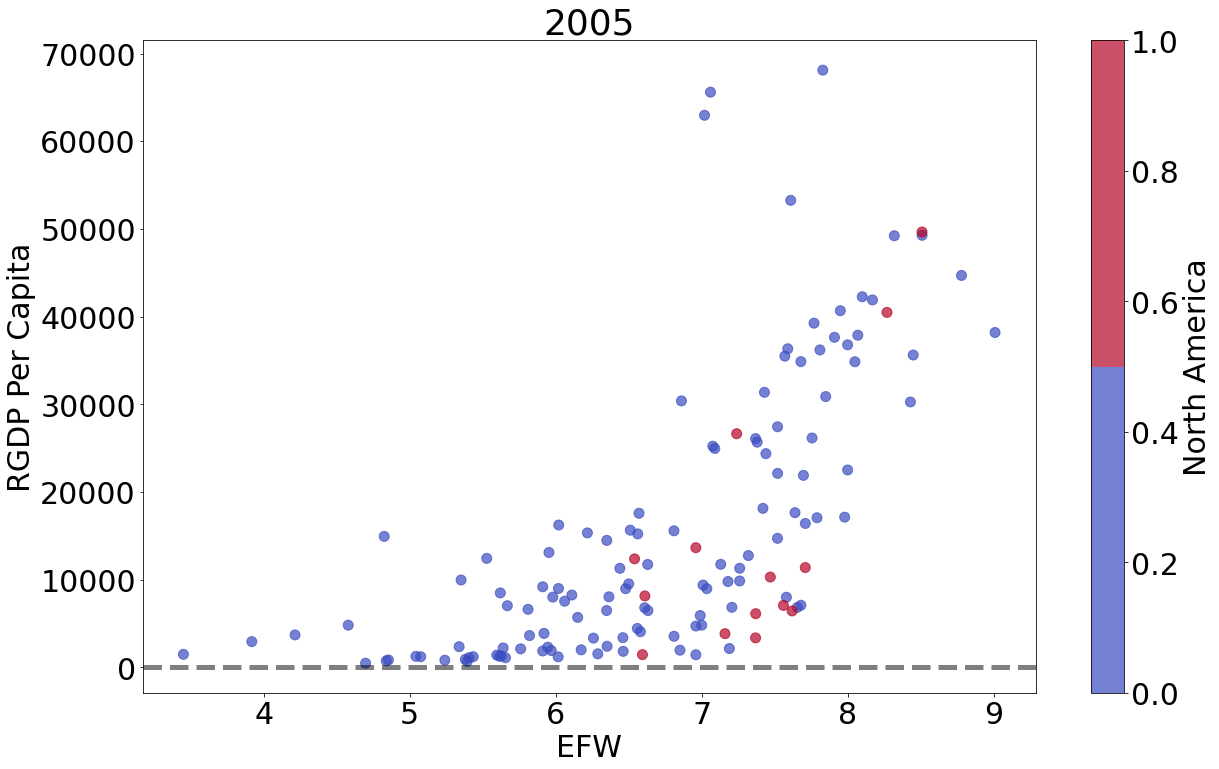

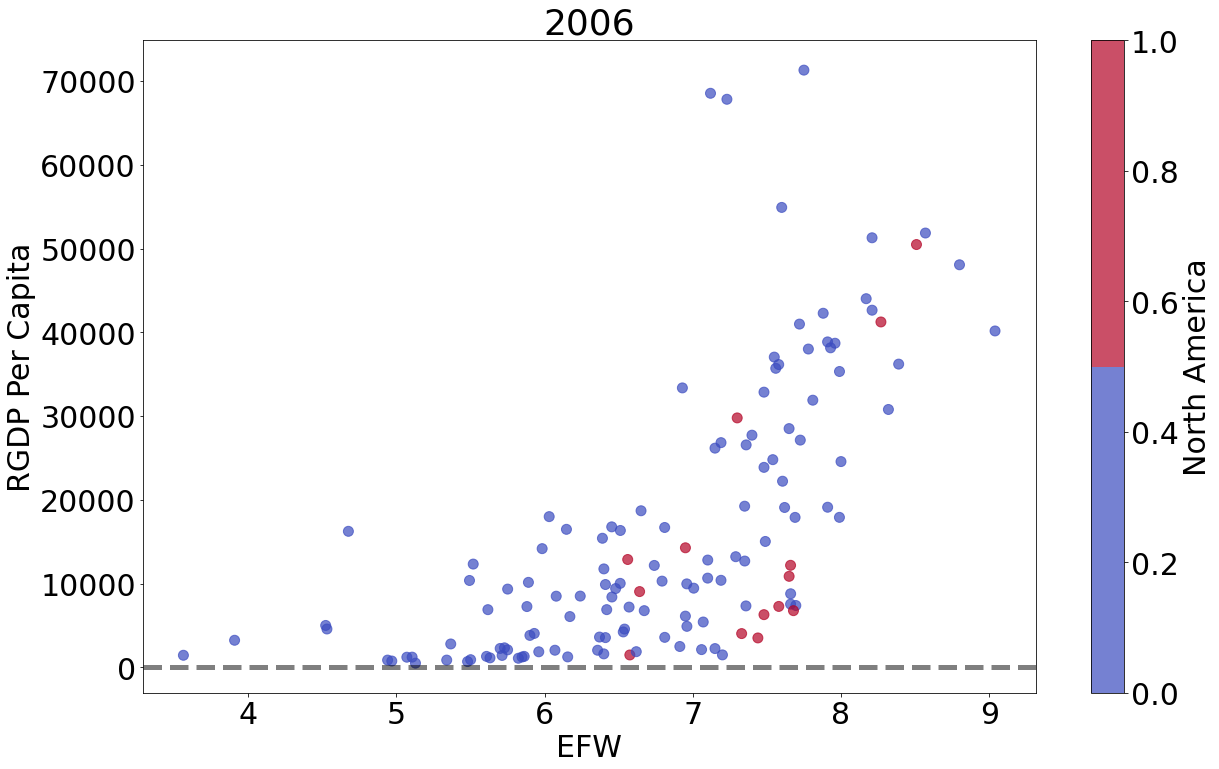

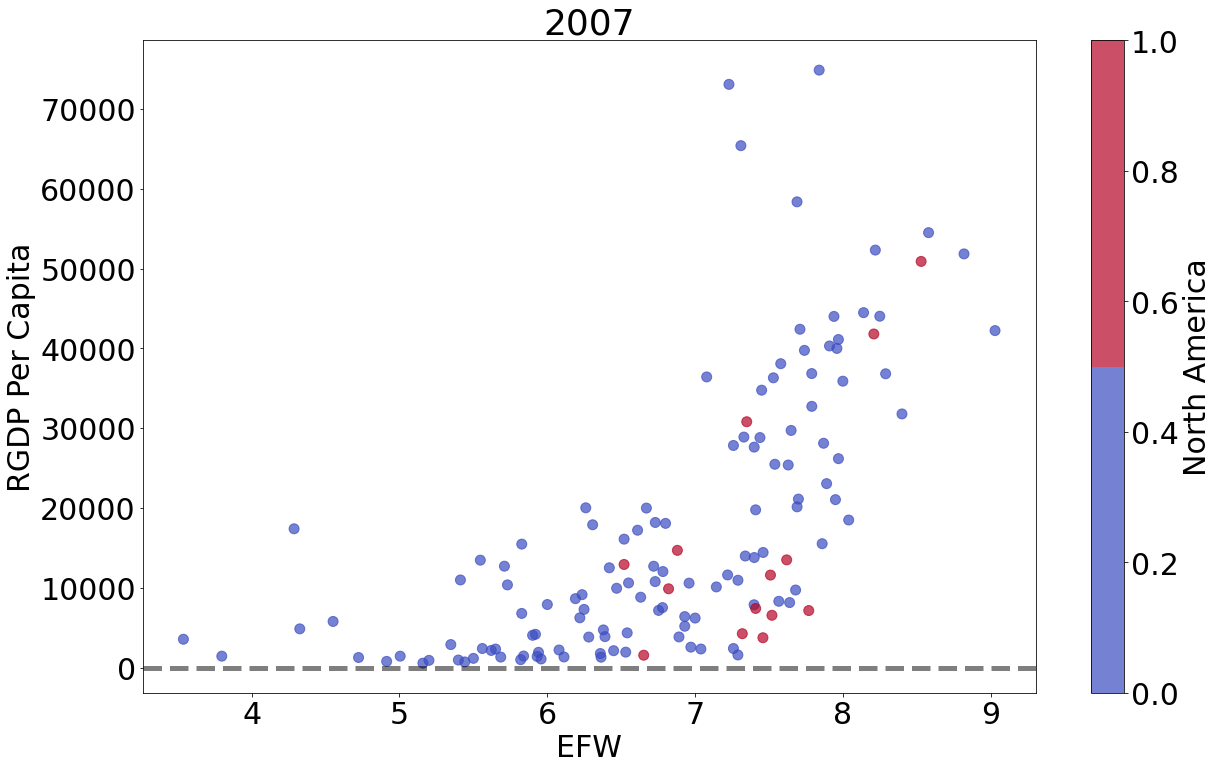

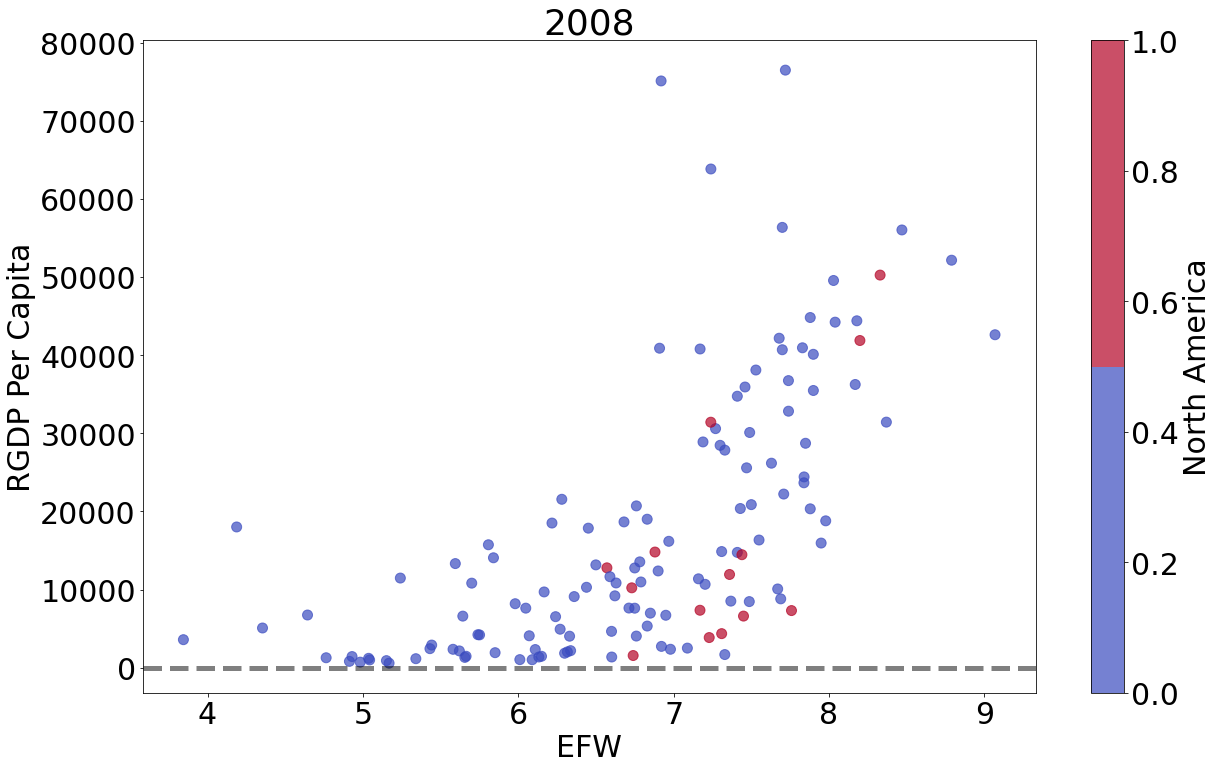

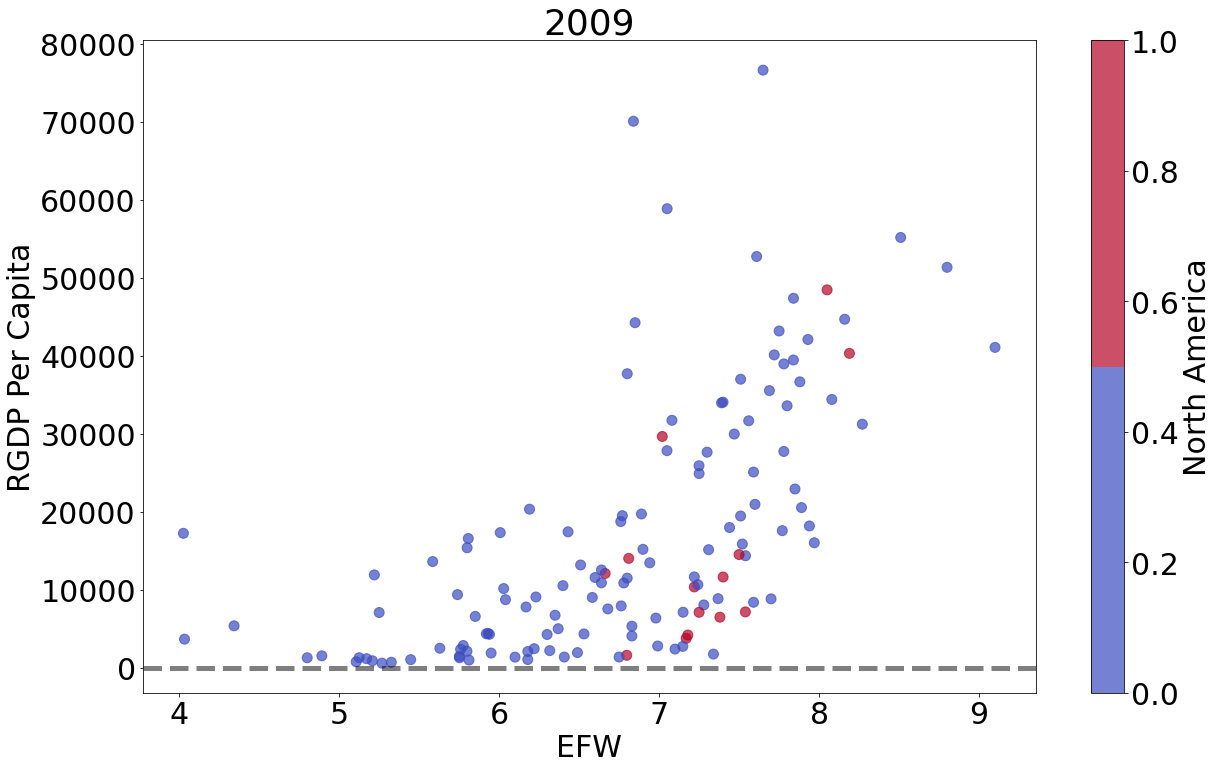

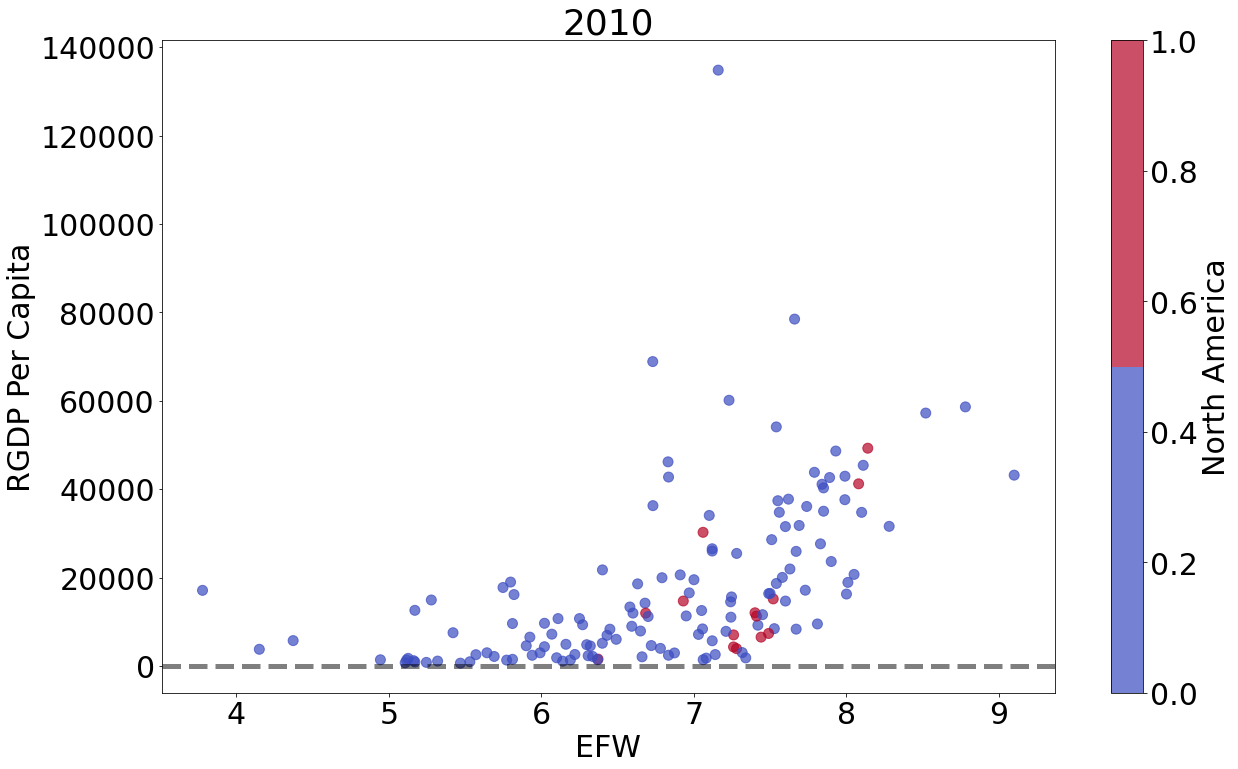

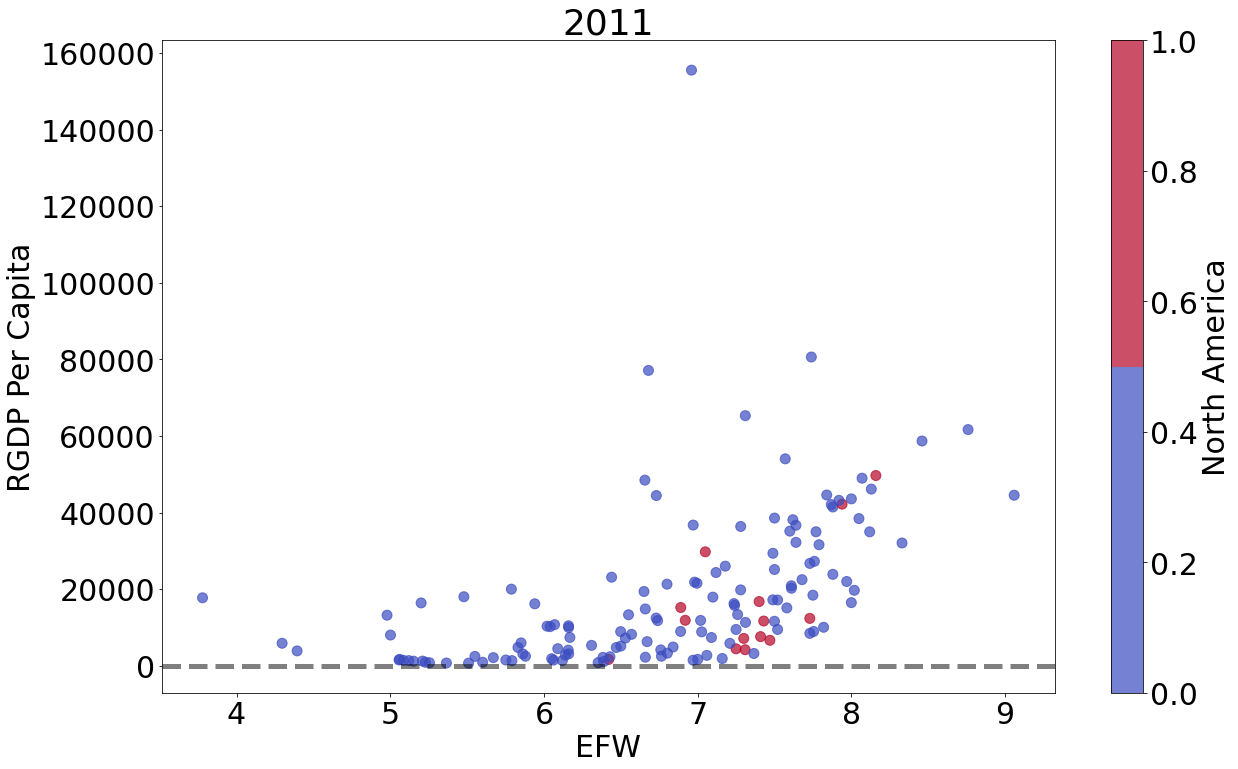

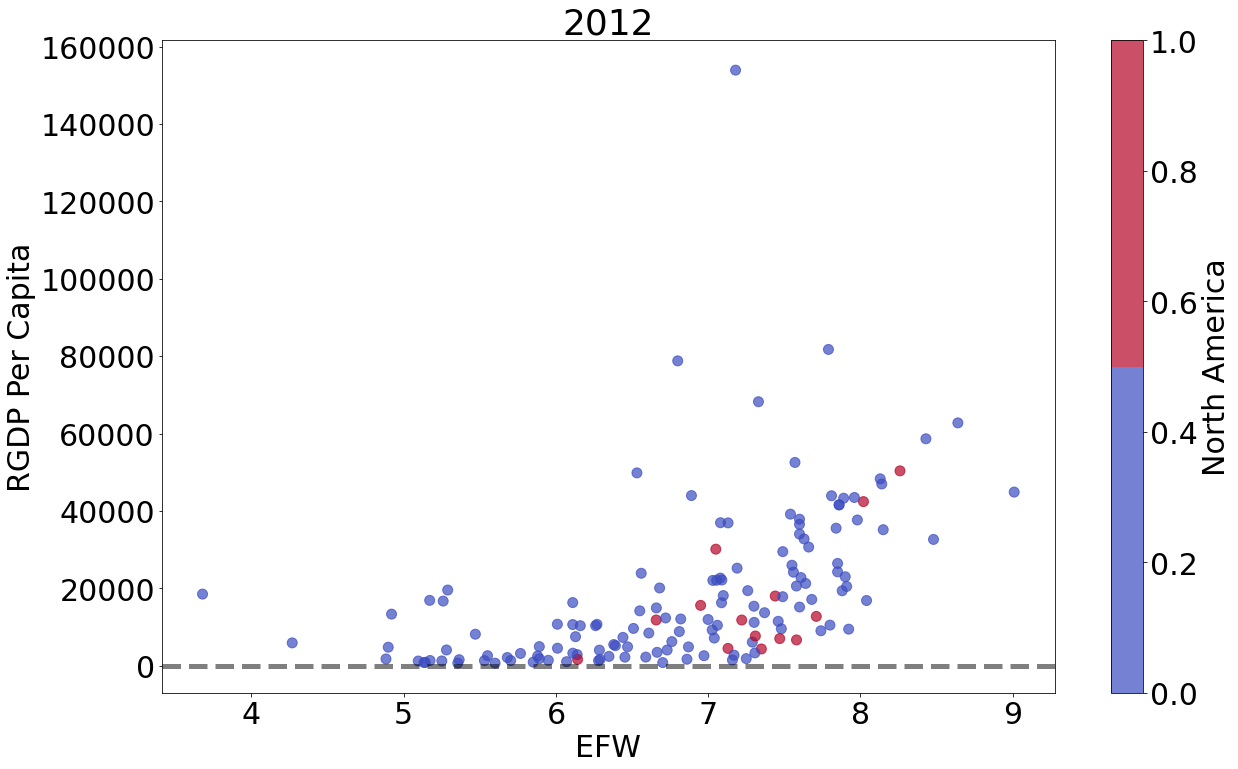

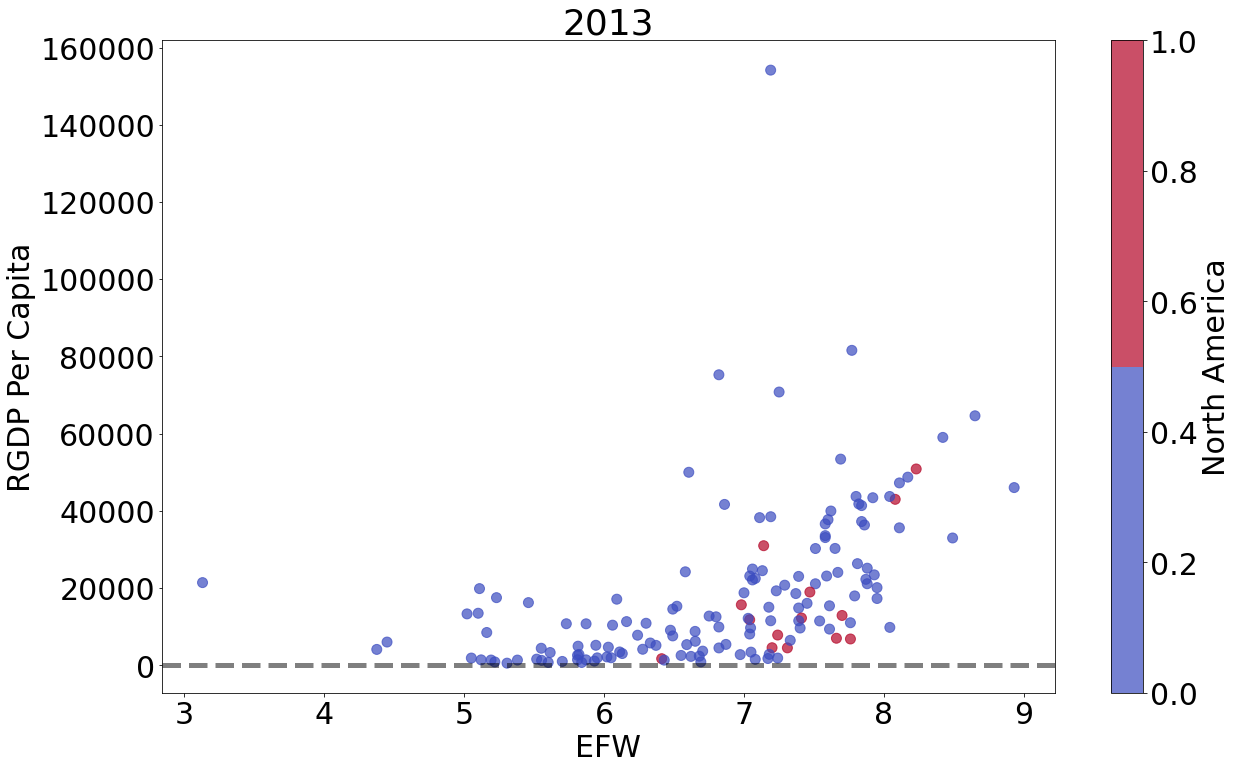

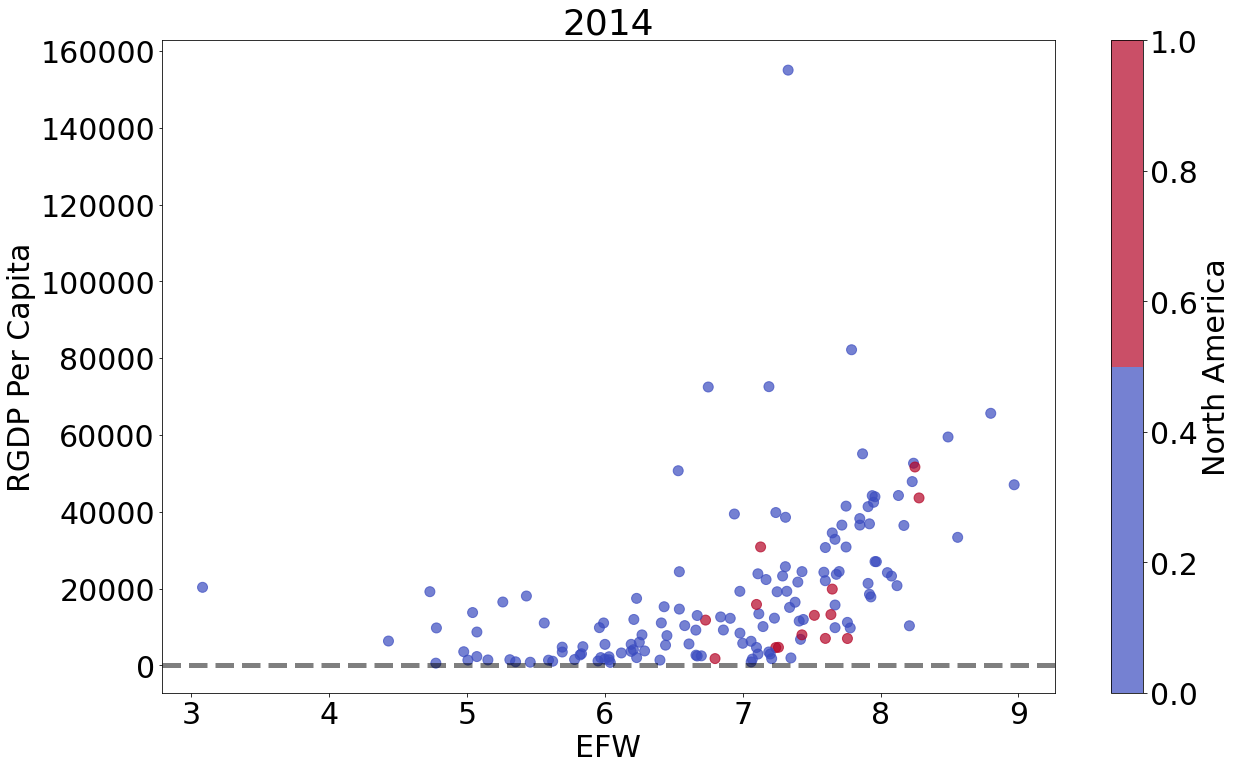

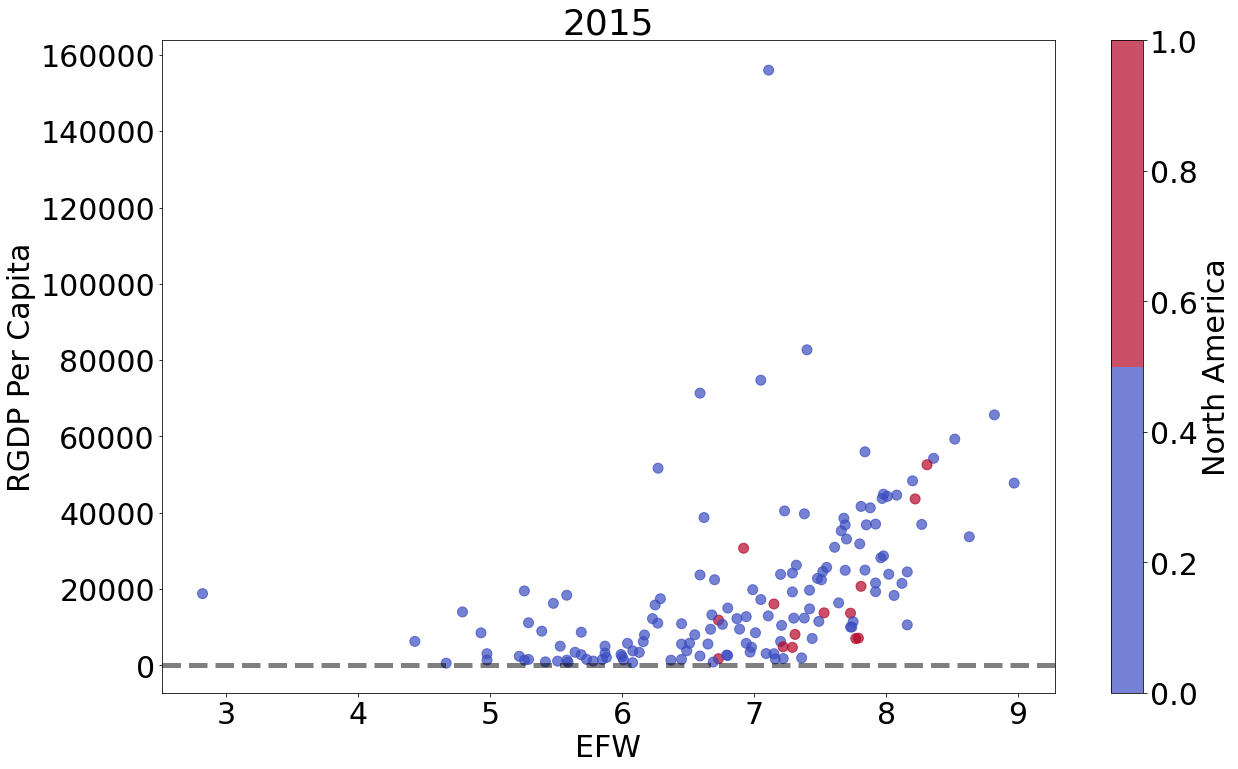

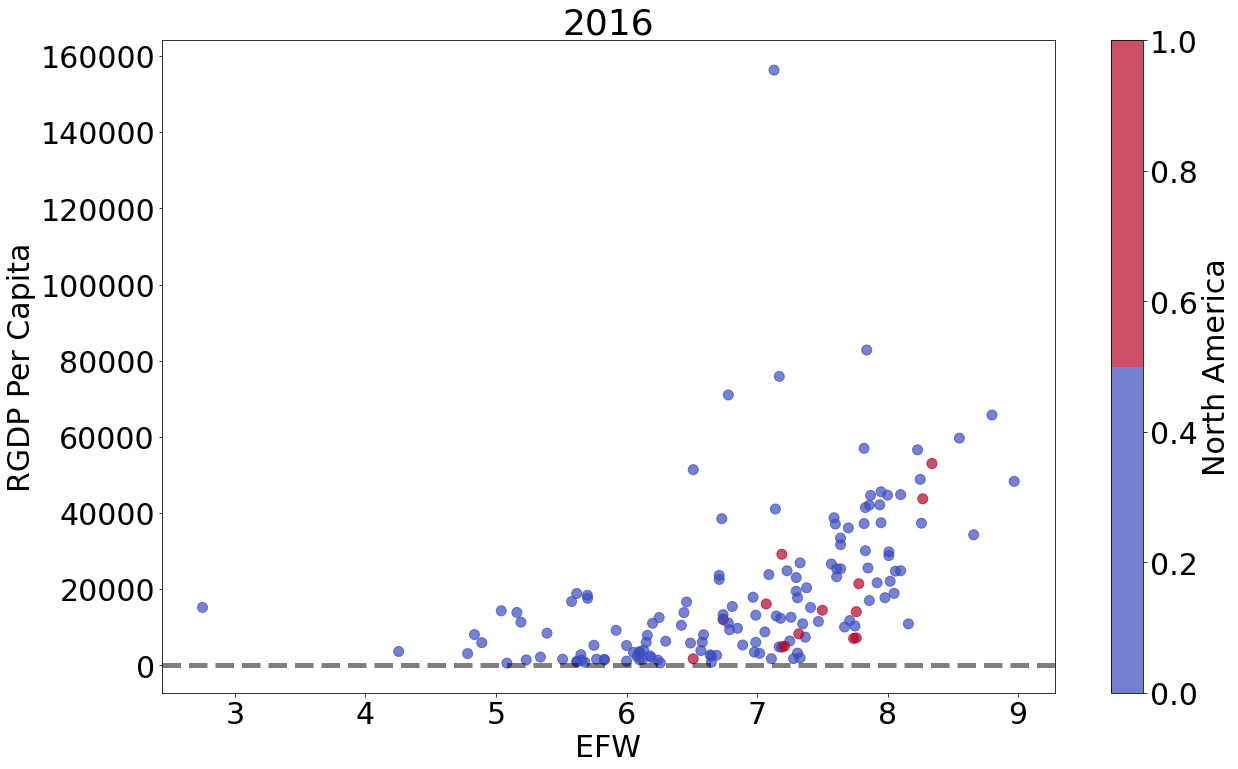

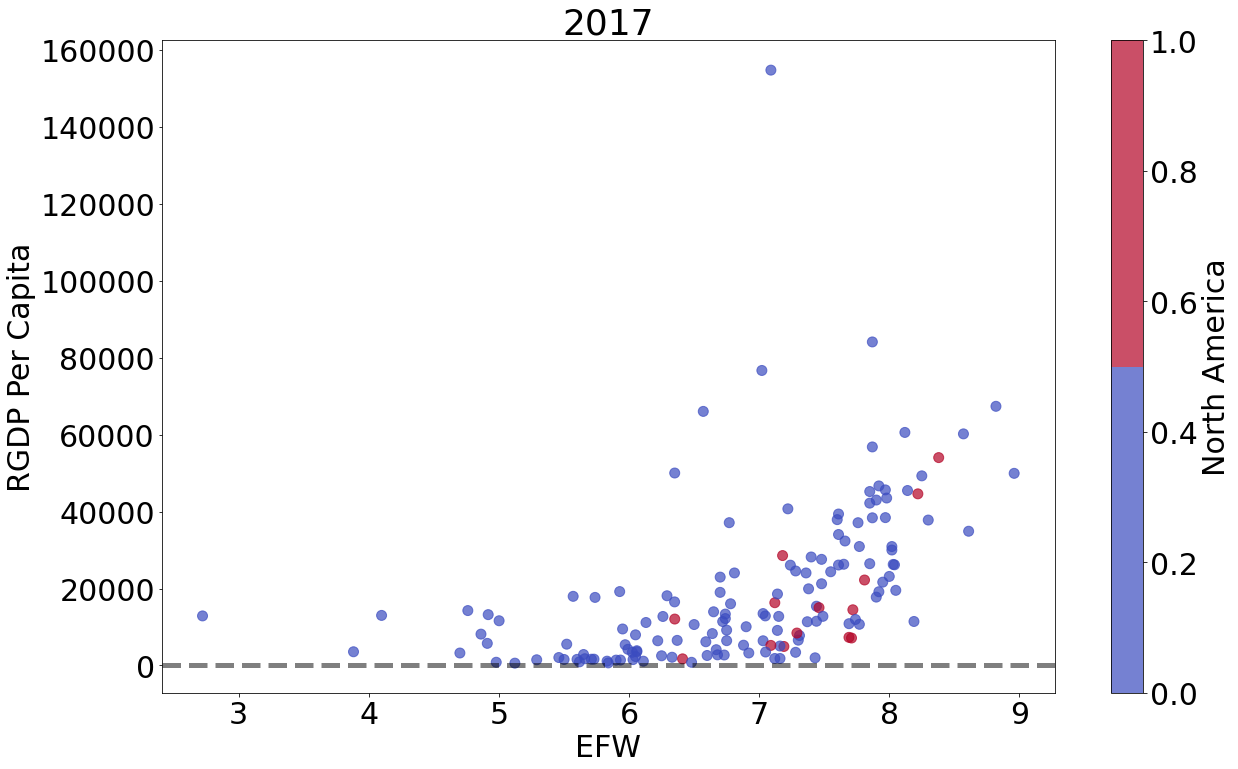

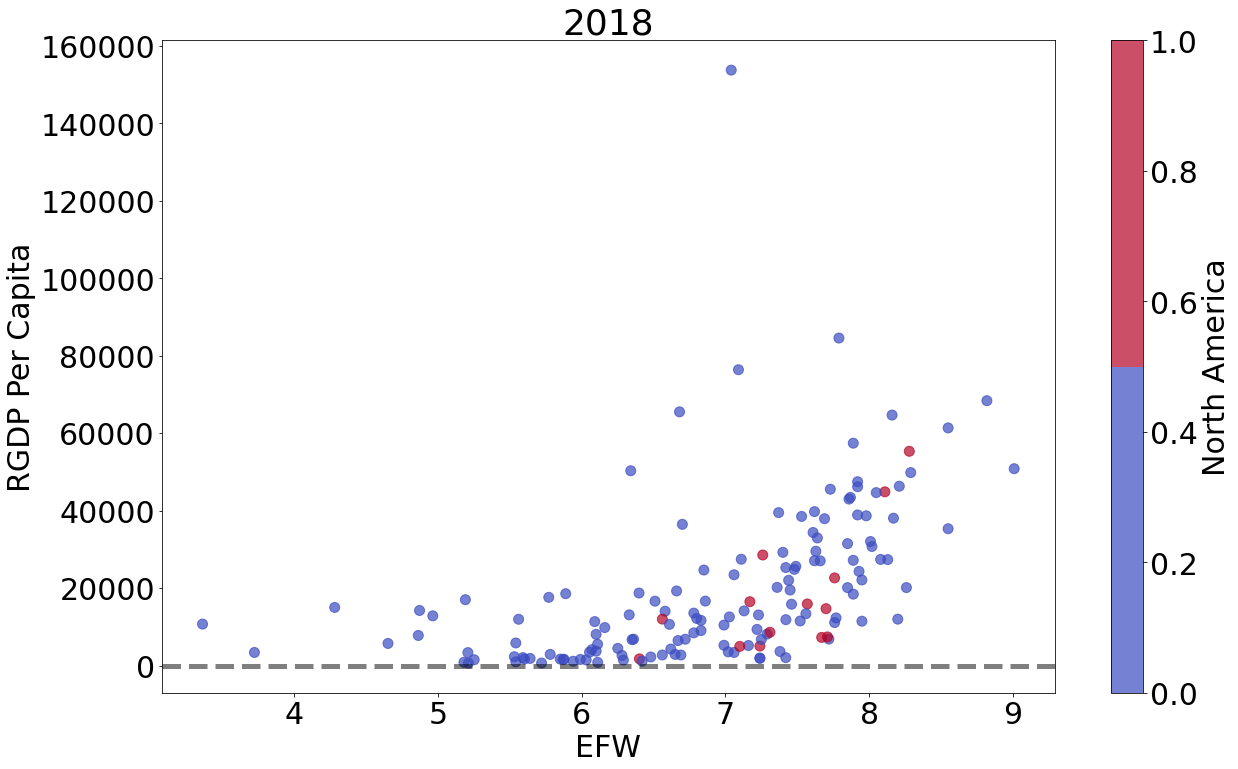

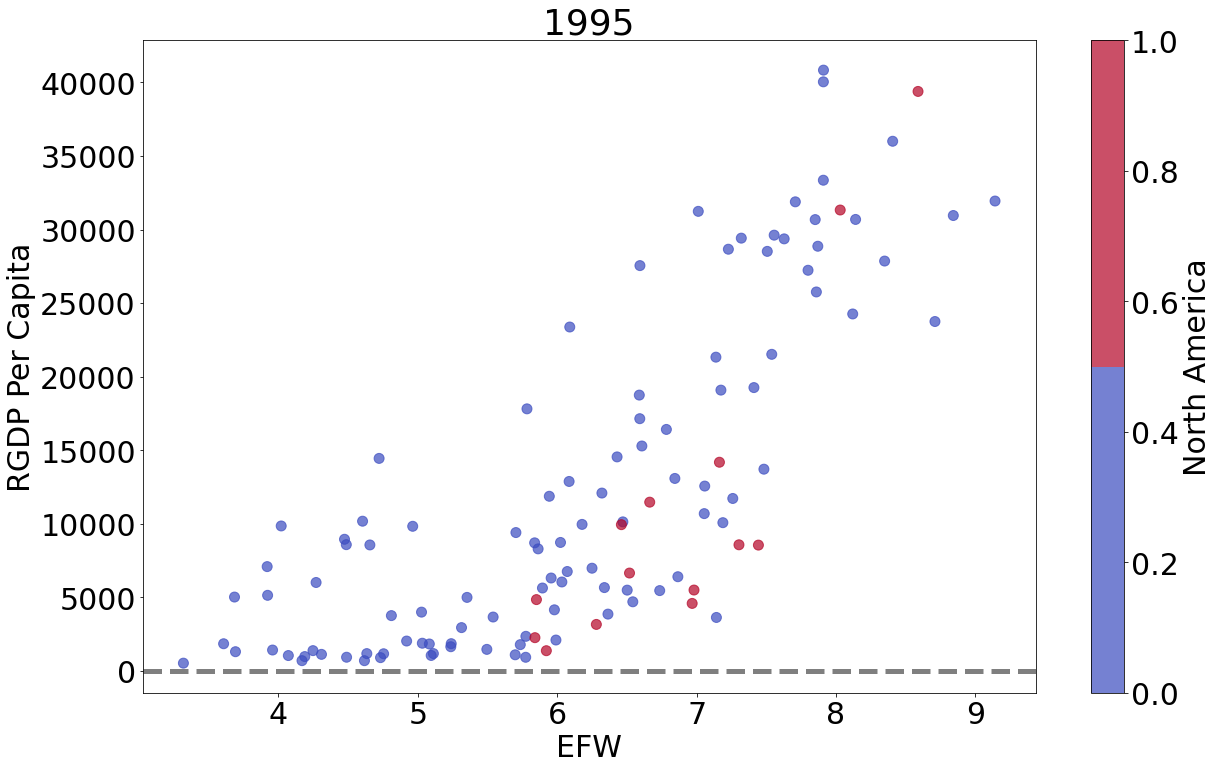

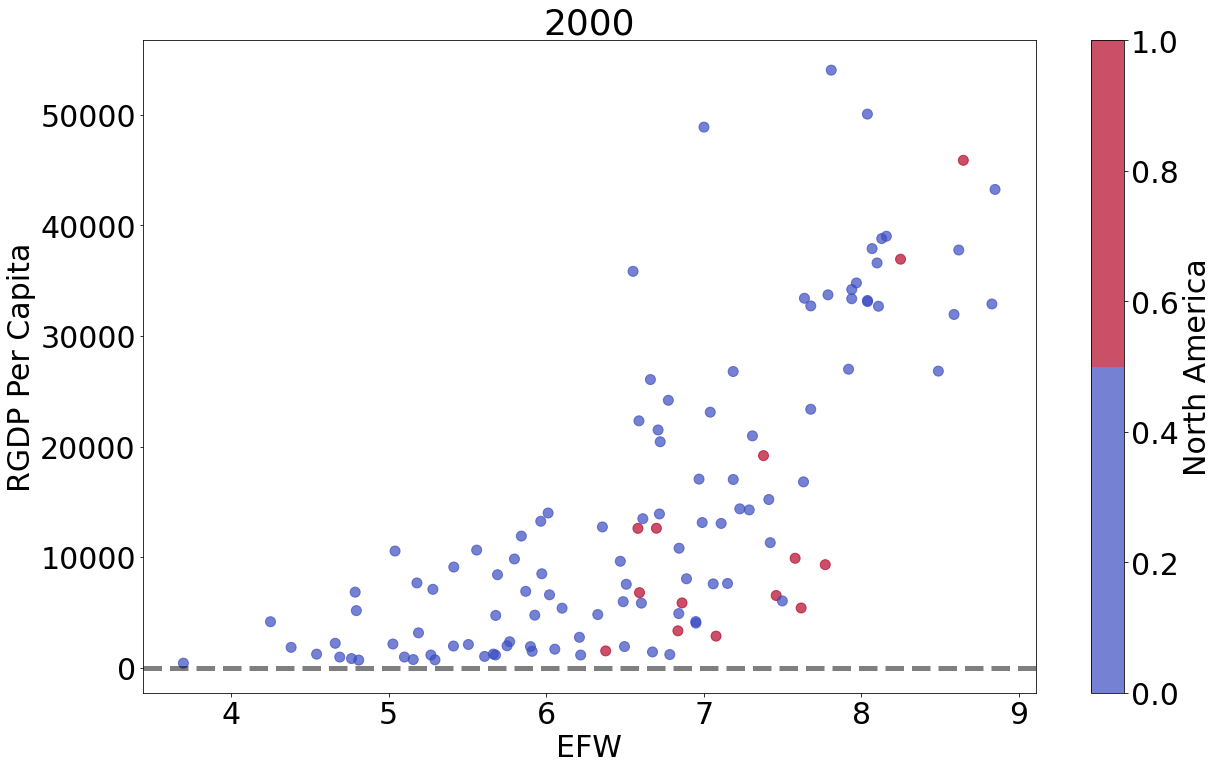

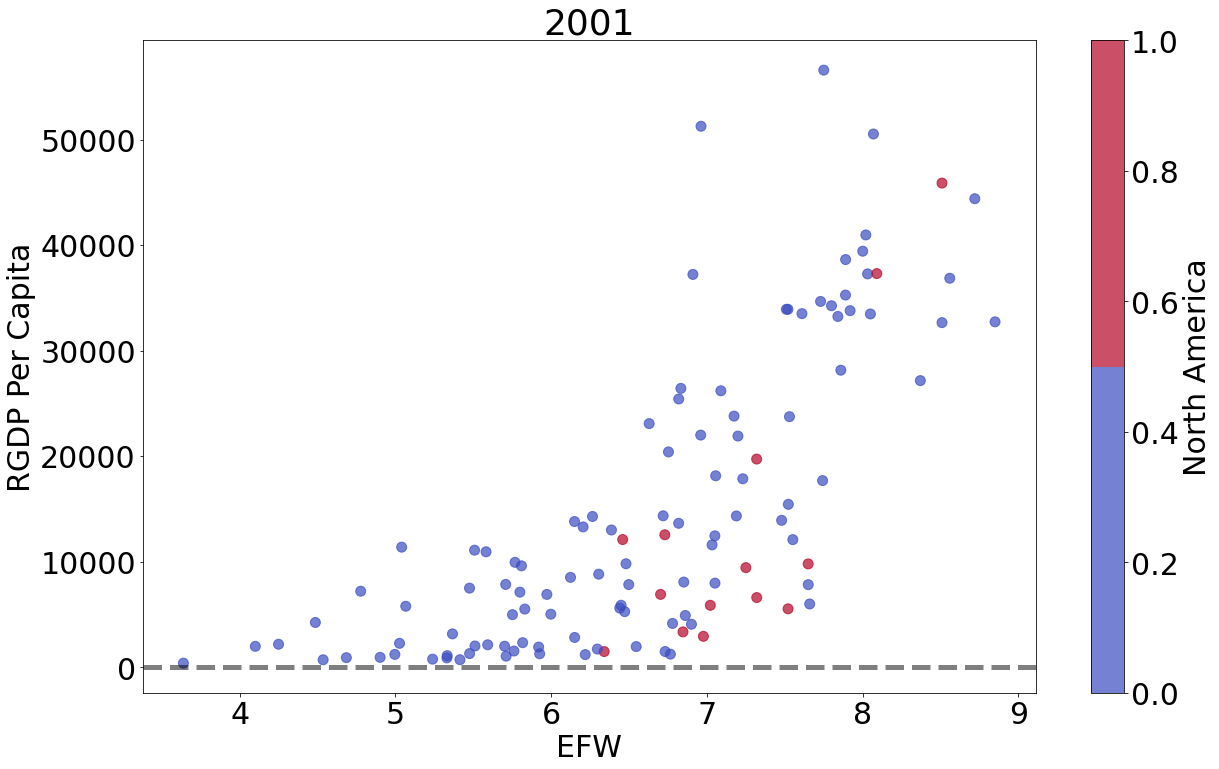

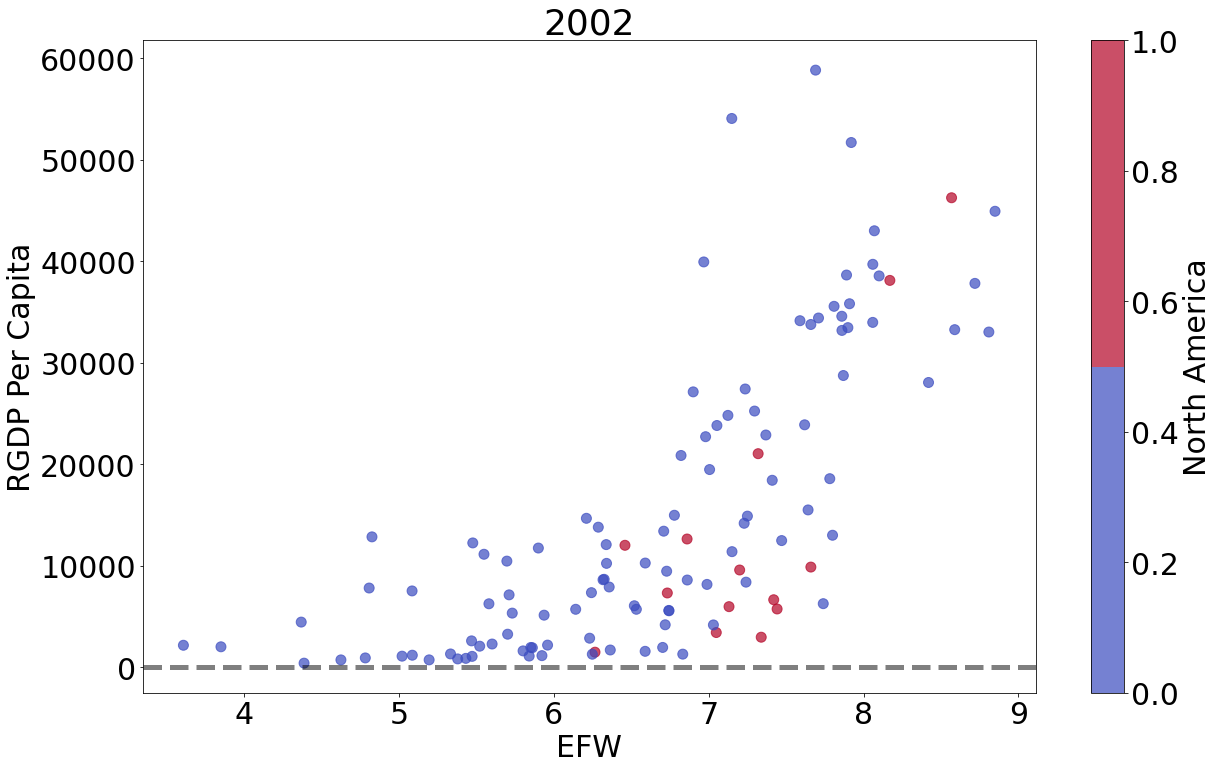

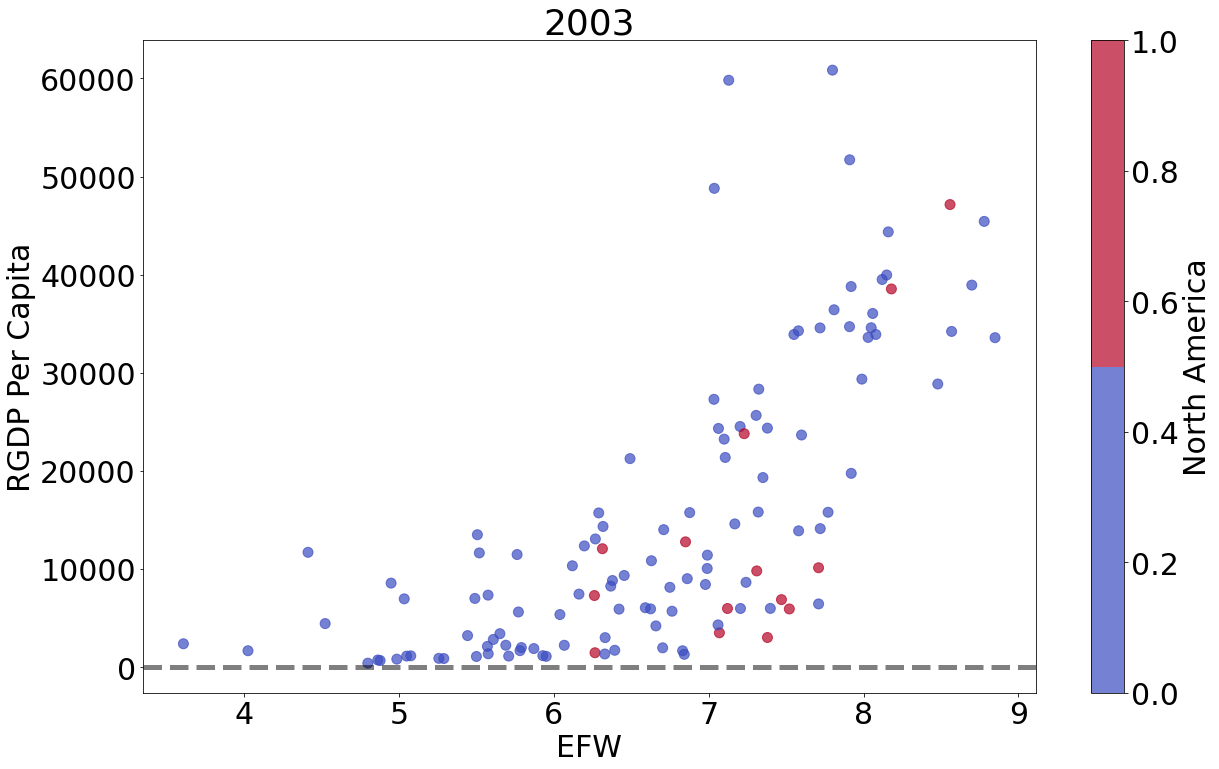

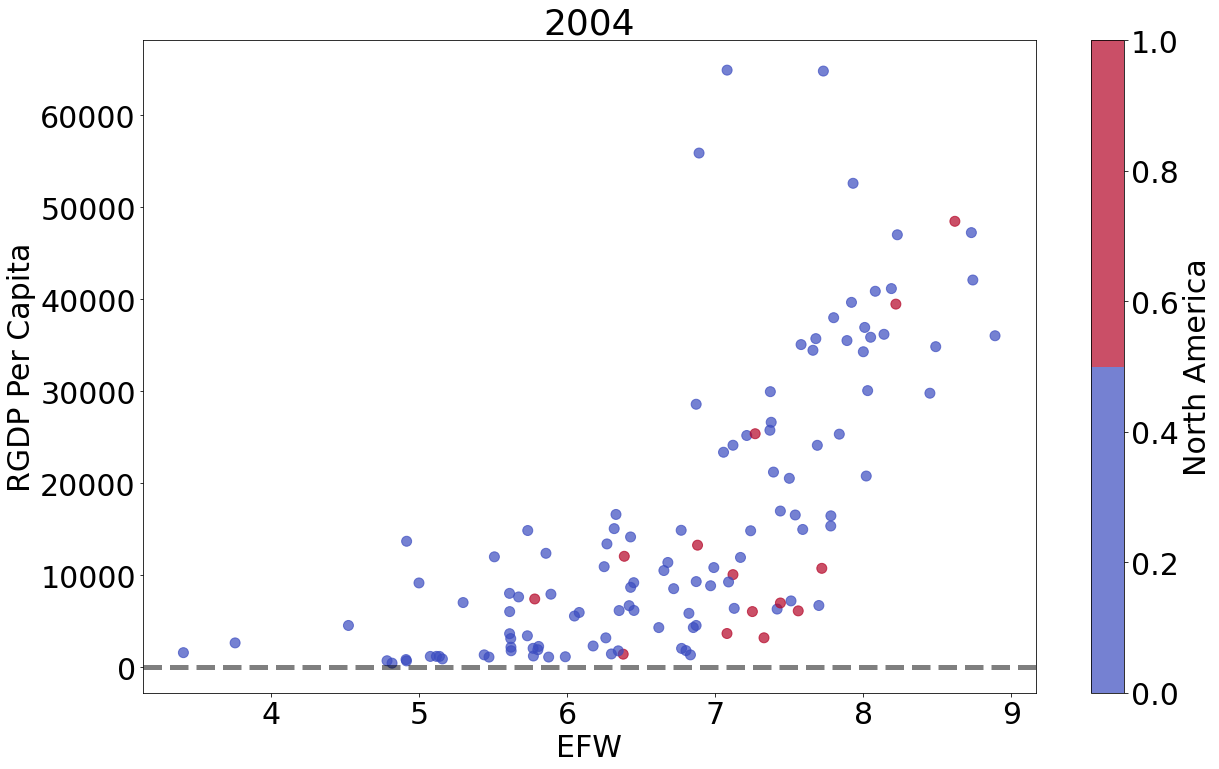

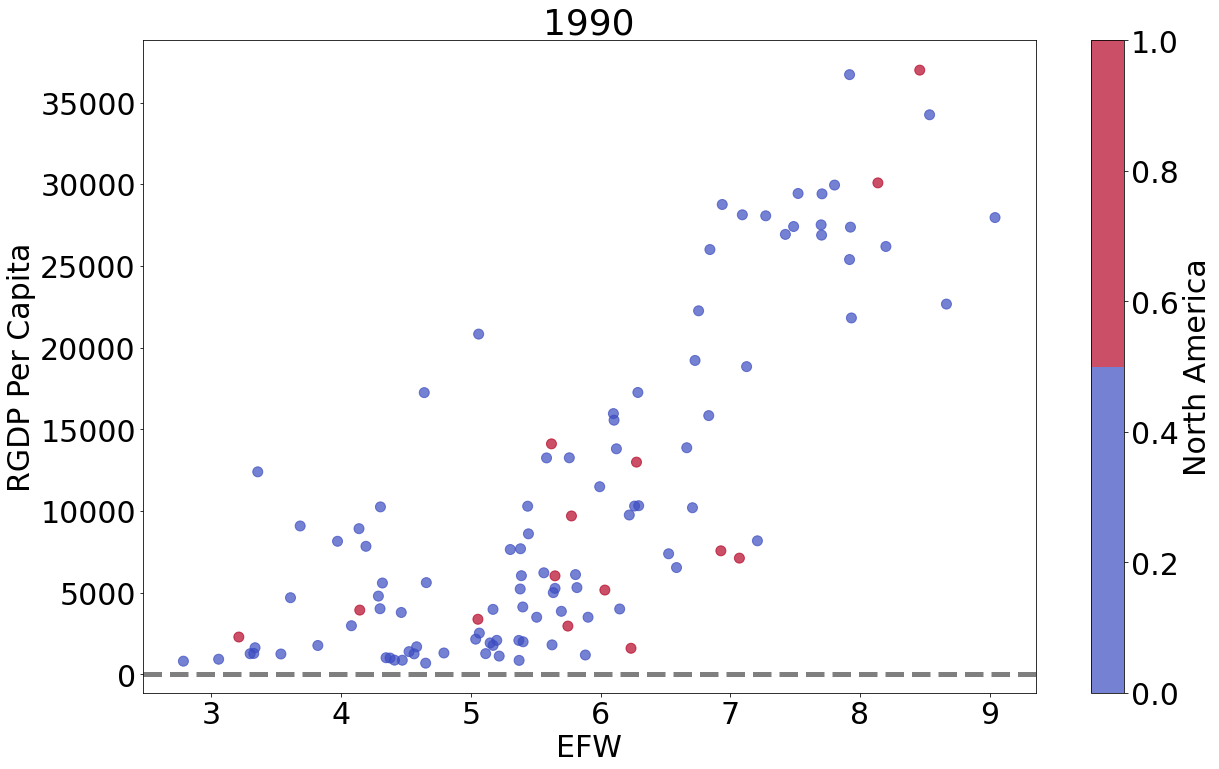

In [5]:
from matplotlib import cm
plt.rcParams.update({"font.size":30})
years = data.dropna().index.get_level_values("Year").unique()
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)
for year in years:

    plot_data = data[data.index.get_level_values("Year") == year]
    fig, ax = plt.subplots(figsize = (20, 12))
    plot_data.plot.scatter(x = "EFW",
                      y = "RGDP Per Capita",
                      c = "North America",
                      cmap = cmap,
                      s = 100,
                      alpha = .7,
                      ax = ax)
    ax.set_title(str(year)[:4])
    ax.axhline(0, ls = "--", color = "k", alpha = .5, linewidth = 5)

In [6]:
n = 5
quantile_var = "RGDP Per Capita"
quantile_name = quantile_var + " " + str(n) + "-tile"
data[quantile_name] = np.nan

In [7]:
def create_quantile(n,
                   data,
                   year,
                   quantile_var,
                   quantile_name):
    # index that identifies countries for a given year
    year_index = data.index.get_level_values("Year") == year
    quantile_values_dict = {i:data[year_index][quantile_var].quantile(i/n) for i in range(1, n+1)}
    for index in data[year_index].index:
        # identify value of the variable of interest
        val = data.loc[index][quantile_var]
        for i in range(1, n+1):
            if val <= quantile_values_dict[i]:
                data.loc[index,[quantile_name]] = int((n+1) - i)
                break
        else:
            continue
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)
data.loc["USA"]

ISO_Code_2 World Bank Region  \
Year                                      
1970-01-01         US     North America   
1975-01-01         US     North America   
1980-01-01         US     North America   
1985-01-01         US     North America   
1990-01-01         US     North America   
1995-01-01         US     North America   
2000-01-01         US     North America   
2001-01-01         US     North America   
2002-01-01         US     North America   
2003-01-01         US     North America   
2004-01-01         US     North America   
2005-01-01         US     North America   
2006-01-01         US     North America   
2007-01-01         US     North America   
2008-01-01         US     North America   
2009-01-01         US     North America   
2010-01-01         US     North America   
2011-01-01         US     North America   
2012-01-01         US     North America   
2013-01-01         US     North America   
2014-01-01         US     North America   
2015-01-01         US     North America   
2016-01-01         US     North America   
2017-01-01         US     North America   
2018-01-01         US     North America   
2019-01-01         US     North America   
2020-01-01         US     North America   

           World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
Year                                                                                                                                              
1970-01-01                                                NaN                                                                                     
1975-01-01                                                NaN                                                                                     
1980-01-01                                                NaN                                                                                     
1985-01-01                                                NaN                                                                                     
1990-01-01                                                  H                                                                                     
1995-01-01                                                  H                                                                                     
2000-01-01                                                  H                                                                                     
2001-01-01                                                  H                                                                                     
2002-01-01                                                  H                                                                                     
2003-01-01                                                  H                                                                                     
2004-01-01                                                  H                                                                                     
2005-01-01                                                  H                                                                                     
2006-01-01                                                  H                                                                                     
2007-01-01                                                  H                                                                                     
2008-01-01                                                  H                                                                                     
2009-01-01                                                  H                                                                                     
2010-01-01                                                  H                                                        

<AxesSubplot:xlabel='EFW', ylabel='RGDP Per Capita'>

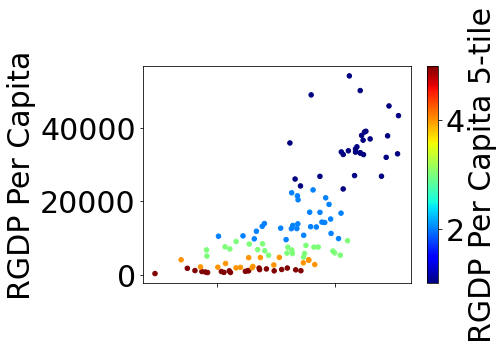

In [8]:
year = "2000"
plot_data = data[data.index.get_level_values("Year") == year]
plot_data.plot.scatter(x = "EFW",
                      y = "RGDP Per Capita",
                      c = "RGDP Per Capita " + str(n)+ "-tile", cmap = "jet")

In [9]:
data[data["North America"]== 1].index.get_level_values("ISO_Code_3").unique()

Index(['BHS', 'BLZ', 'BRB', 'CAN', 'CRI', 'DOM', 'GTM', 'HND', 'HTI', 'JAM',
       'MEX', 'NIC', 'PAN', 'SLV', 'TTO', 'USA'],
      dtype='object', name='ISO_Code_3')

In [10]:
import statsmodels.api as sm
def regress(data, x_names, y_names, constant = False):
    X = data[x_names]
    if constant:
        X["constant"] = 1
    y = data[y_name]
    results = sm.OLS(y, X).fit()
    return results

y_name = ["EFW"]
X_names = ["RGDP Per Capita"]

reg_data = data.dropna()

results = regress(reg_data, X_names, y_name)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    EFW   R-squared (uncentered):                   0.558
Model:                            OLS   Adj. R-squared (uncentered):              0.557
Method:                 Least Squares   F-statistic:                              3537.
Date:                Wed, 10 May 2023   Prob (F-statistic):                        0.00
Time:                        15:54:03   Log-Likelihood:                         -8234.8
No. Observations:                2808   AIC:                                  1.647e+04
Df Residuals:                    2807   BIC:                                  1.648e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
RGDP Per Capita     0.0002   3.49e-06     59.474      0.000       0.000       0.000
==============================================================================
Omnibus:                     1991.287   Durbin-Watson:                   0.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45672.226
Skew:                          -3.085   Prob(JB):                         0.00
Kurtosis:                      21.769   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Please Remember:

R² is computed without centering (uncentered) since the model does not contain a constant.

Standard Errors assume that the covariance matrix of the errors is correctly specified.


C:\Users\Owner\AppData\Local\Temp/ipykernel_20344/343184040.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
C:\Users\Owner\AppData\Local\Temp/ipykernel_20344/343184040.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Residuals"] = results.resid


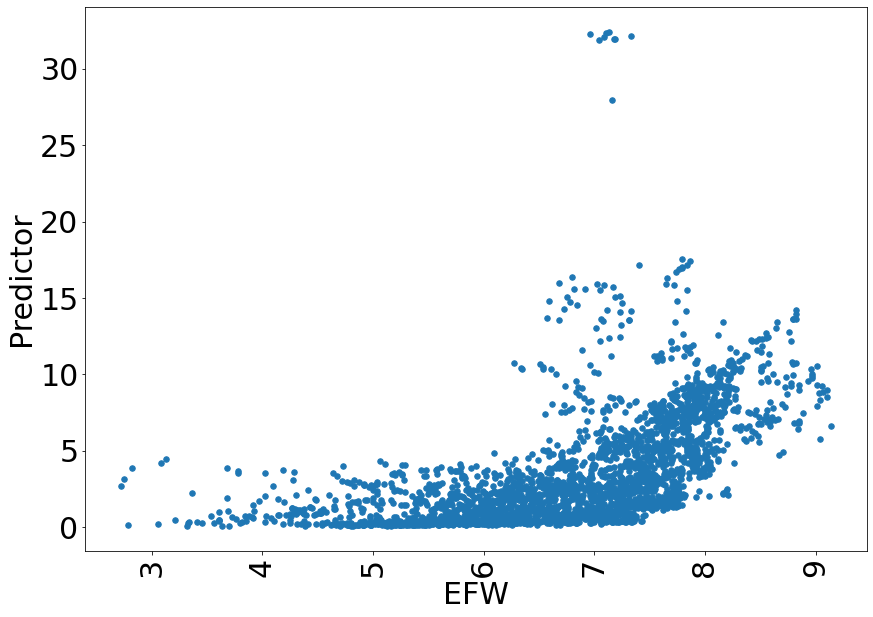

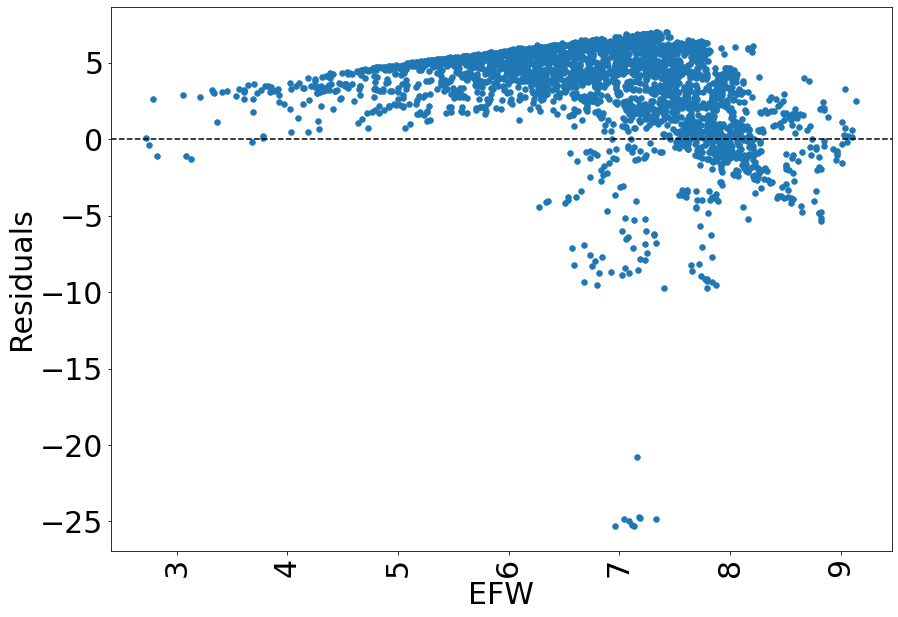

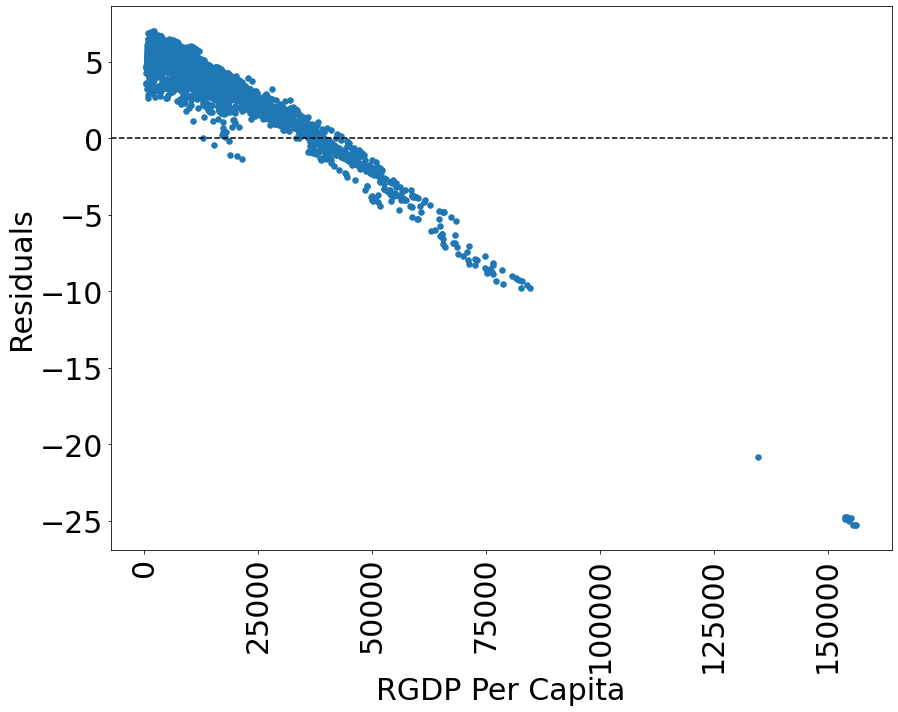

In [11]:
def plot_residuals(df, y_var, x_vars):
    fig, ax = plt.subplots(figsize = (14,10))
    df.plot.scatter(x = y_var[0],
                   y = "Predictor", s = 30, ax = ax)
    plt.xticks(rotation = 90)
    plt.show()
    plt.close()
    
    for var in y_var + x_vars:
        fig, ax = plt.subplots(figsize = (14,10))
        df.plot.scatter(x = var,
                       y = "Residuals",
                       s = 30, ax = ax)
        ax.axhline(0, ls = "--", color = "k")
        plt.xticks(rotation = 90)
        plt.show()
        plt.close()
reg_data["Predictor"] = results.predict()
reg_data["Residuals"] = results.resid
plot_residuals(reg_data, y_name, X_names)

In [12]:
X_names = ["RGDP Per Capita"]
reg_data = reg_data[y_name + X_names].groupby("ISO_Code_3").diff().dropna()
results = regress(reg_data,
                  X_names, y_name, constant = False)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    EFW   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):              0.033
Method:                 Least Squares   F-statistic:                              91.24
Date:                Wed, 10 May 2023   Prob (F-statistic):                    2.78e-21
Time:                        15:54:04   Log-Likelihood:                         -241.42
No. Observations:                2656   AIC:                                      484.8
Df Residuals:                    2655   BIC:                                      490.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
RGDP Per Capita   3.59e-05   3.76e-06      9.552      0.000    2.85e-05    4.33e-05
==============================================================================
Omnibus:                     1715.914   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38159.332
Skew:                           2.693   Prob(JB):                         0.00
Kurtosis:                      20.771   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

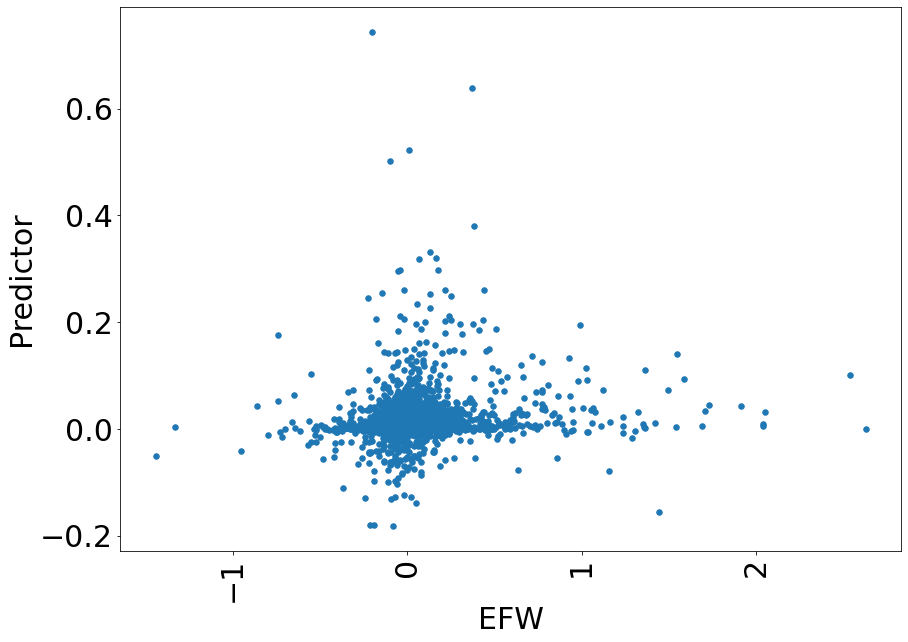

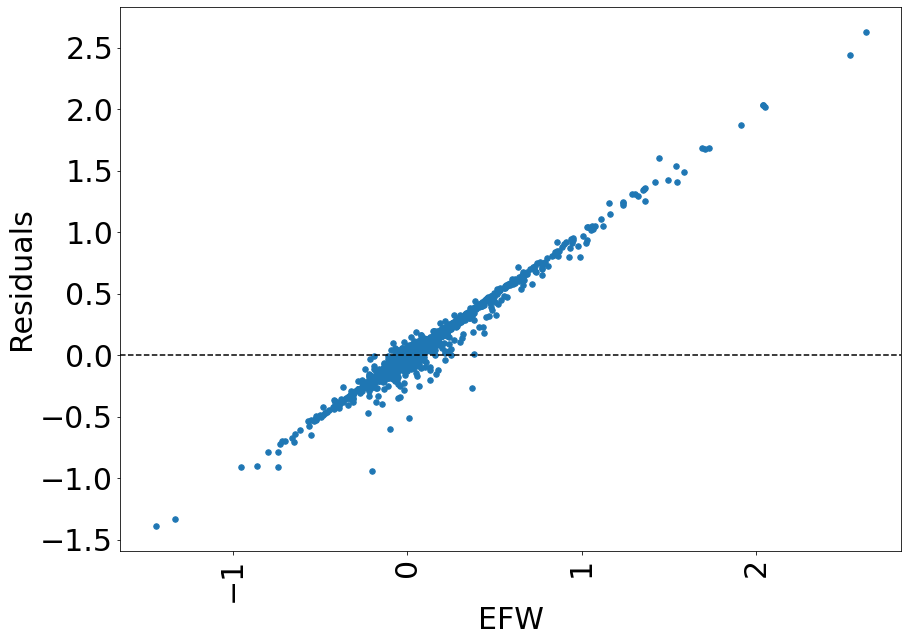

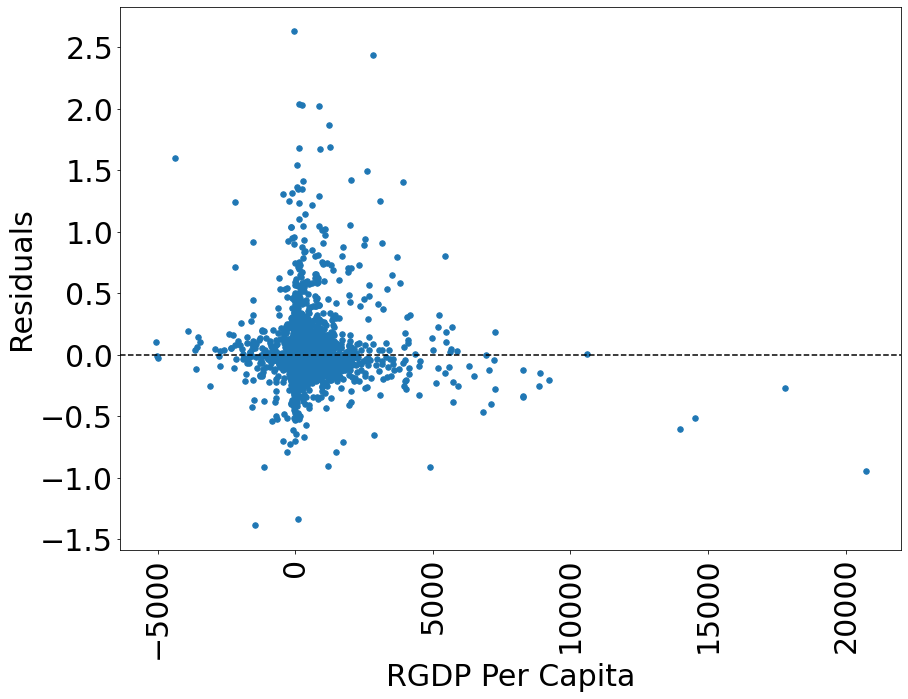

In [13]:
reg_data["Predictor"] = results.predict()
reg_data["Residuals"] = results.resid
plot_residuals(reg_data, y_name, X_names)

## Panel Regression

The indicator variable plays a key role in a very popular regression within economics: the panel (or fixed effects) regression. A panel regression is an OLS regression that includes an indicator variable for attributes defined in one or both index columns. Conventiently, the panel regression is often used to control for effects between different political units – i.e., cities, states, nations, etc.... Using the data from the previous examples, we will run a panel regression with fixed effects for each nation. We regress the data over time, holding constant a level effect provided by the unique indicator variable associated with each nation. The indicator variables that drive results in the panel regression adjust the y-intercept indicated by the constant β0 with a unique adjustment for each state. We will use the module linearmodels, an extension of statsmodels, to run panel regression to improve the fit of the model.

Since the index includes includes both “Year” and “ISO_Code”, we must select which type of fixed effect the regression will employ. We create the regression to allow for entity fixed effects, time fixed effects, or both, in a single regression.

In [ ]:
!pip install linearmodels

In [ ]:
from linearmodels import PanelOLS
def panel_regress(data, x_names, y_names, constant = False, 
                  entity = False, time = False):
    X = data[x_names]
    if constant:
        X["constant"] = 1
    y = data[y_name]
    results = PanelOLS(y, X,
                      entity_effects = entity, 
                       time_effects = time).fit(cov_type = "clustered", cluster_entity = True)
    return results

reg_data = data.dropna()
results = panel_regress(reg_data, X_names, y_name,
              constant = True,
             entity = True,
             time = True)
results

C:\Users\Owner\AppData\Local\Temp/ipykernel_20344/2033816294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
C:\Users\Owner\AppData\Local\Temp/ipykernel_20344/2033816294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Residuals"] = results.resids


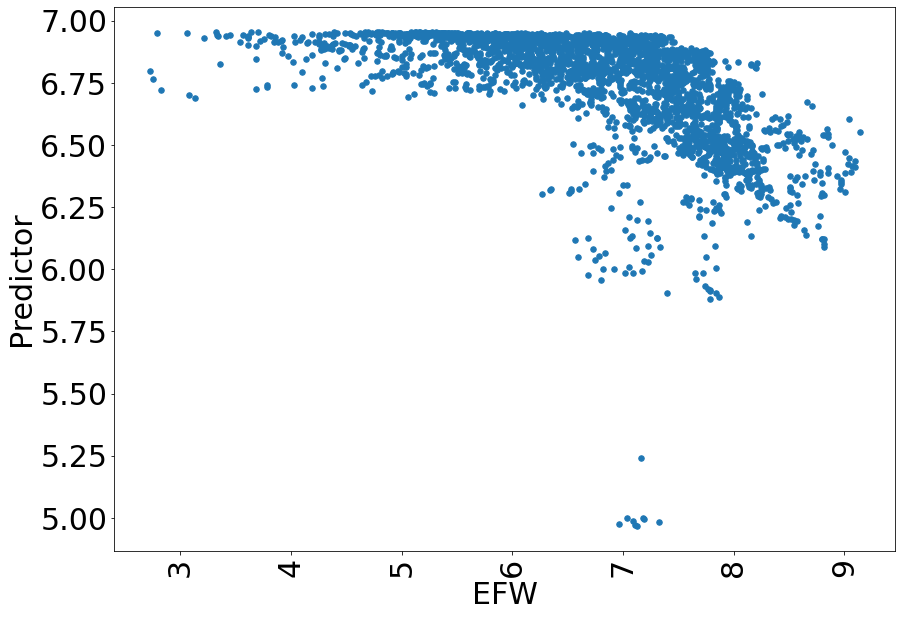

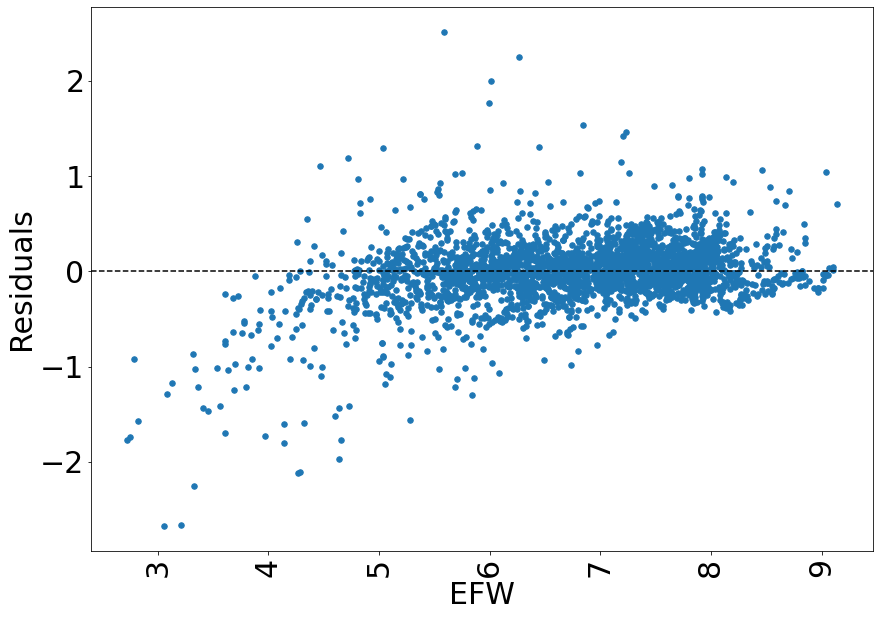

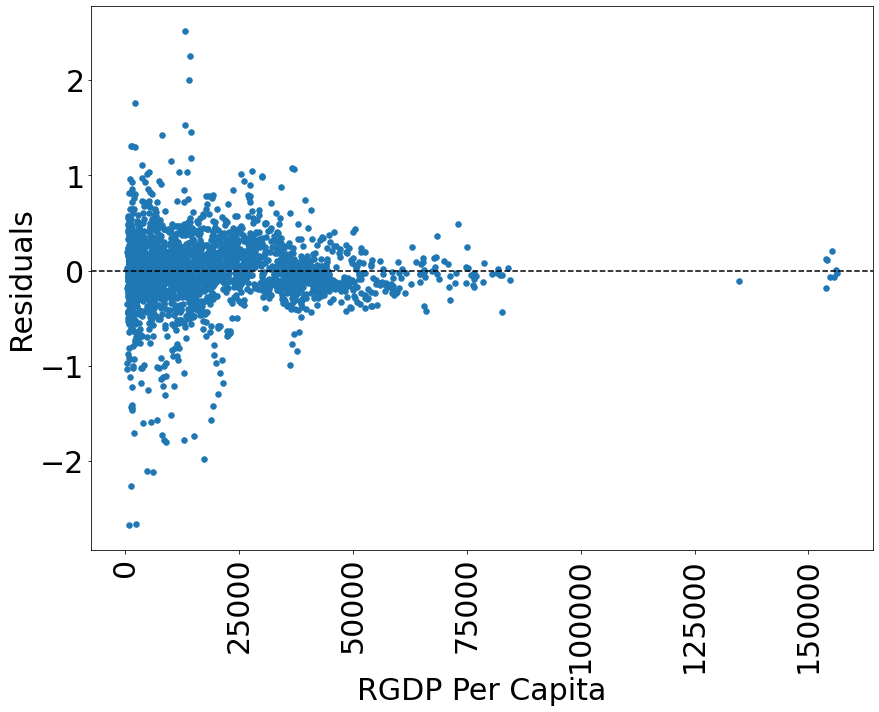

In [16]:
reg_data["Predictor"] = results.predict()
reg_data["Residuals"] = results.resids
plot_residuals(reg_data, y_name, X_names)

In [19]:
for entity in [True, False]:
    for time in [True, False]:
        reg_data = data.dropna()
        results = panel_regress(reg_data, X_names,
                                y_name, constant = True,
                                entity = entity,
                                time = time)
        print("Entity: " + str(entity)+ "\nTime: " + str(time))
        print(results)
        reg_data["Predictor"] = results.predict()
        reg_data["Residuals"] = results.resids
        plot_residuals(reg_data, y_name, X_names)

C:\Users\Owner\AppData\Local\Temp/ipykernel_20344/2320786619.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["constant"] = 1


AbsorbingEffectError: 
The model cannot be estimated. The included effects have fully absorbed
one or more of the variables. This occurs when one or more of the dependent
variable is perfectly explained using the effects included in the model.

The following variables or variable combinations have been fully absorbed
or have become perfectly collinear after effects are removed:

          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Angola, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Angola, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Mozambique, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Georgia, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sweden, Countries.Switzerland, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Morocco, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bosnia and Herzegovina, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Finland, Countries.France, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Brazil, Countries.Bulgaria, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Botswana, Countries.Brazil, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Bosnia and Herzegovina, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Finland, Countries.France, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Liberia, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Canada, Countries.Central African Republic, Countries.China, Countries.Colombia, Countries.Finland, Countries.France, Countries.Ghana, Countries.Greece, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Ireland, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Netherlands, Countries.New Zealand, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Rwanda, Countries.Saudi Arabia, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Canada, Countries.Central African Republic, Countries.China, Countries.Colombia, Countries.Denmark, Countries.Egypt, Arab Rep., Countries.Finland, Countries.France, Countries.Ghana, Countries.Greece, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Israel, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Liberia, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Netherlands, Countries.New Zealand, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Paraguay, Countries.Peru, Countries.Poland, Countries.Portugal, Countries.Saudi Arabia, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belgium, Countries.Bolivia, Countries.Brazil, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Finland, Countries.France, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Rwanda, Countries.Saudi Arabia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Barbados, Countries.Belgium, Countries.Bosnia and Herzegovina, Countries.Brazil, Countries.Bulgaria, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Denmark, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.Estonia, Countries.Finland, Countries.France, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Ireland, Countries.Israel, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Liberia, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Finland, Countries.France, Countries.Gambia, The, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Ireland, Countries.Israel, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sweden, Countries.Switzerland, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Finland, Countries.France, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lebanon, Countries.Liberia, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sweden, Countries.Switzerland, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant

Set drop_absorbed=True to automatically drop absorbed variables.


In [20]:
X_names = list(data.keys())[2:7]
y_name = ["RGDP Per Capita"]

for entity in [True, False]:
    for time in [True, False]:
        reg_data = data.dropna()
        results = panel_regress(reg_data, X_names,
                                y_name, constant = True,
                                entity = entity,
                                time = time)
        print("Entity: " + str(entity)+ "\nTime: " + str(time))
        print(results)
        reg_data["Predictor"] = results.predict()
        reg_data["Residuals"] = results.resids
        plot_residuals(reg_data, y_name, X_names)

C:\Users\Owner\AppData\Local\Temp/ipykernel_20344/2320786619.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["constant"] = 1


AbsorbingEffectError: 
The model cannot be estimated. The included effects have fully absorbed
one or more of the variables. This occurs when one or more of the dependent
variable is perfectly explained using the effects included in the model.

The following variables or variable combinations have been fully absorbed
or have become perfectly collinear after effects are removed:

          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Angola, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Angola, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Mozambique, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Georgia, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sweden, Countries.Switzerland, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Morocco, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bosnia and Herzegovina, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Finland, Countries.France, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Brazil, Countries.Bulgaria, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Botswana, Countries.Brazil, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Bosnia and Herzegovina, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Finland, Countries.France, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Liberia, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Canada, Countries.Central African Republic, Countries.China, Countries.Colombia, Countries.Finland, Countries.France, Countries.Ghana, Countries.Greece, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Ireland, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Netherlands, Countries.New Zealand, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Rwanda, Countries.Saudi Arabia, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Canada, Countries.Central African Republic, Countries.China, Countries.Colombia, Countries.Denmark, Countries.Egypt, Arab Rep., Countries.Finland, Countries.France, Countries.Ghana, Countries.Greece, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Israel, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Liberia, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Netherlands, Countries.New Zealand, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Paraguay, Countries.Peru, Countries.Poland, Countries.Portugal, Countries.Saudi Arabia, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belgium, Countries.Bolivia, Countries.Brazil, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Finland, Countries.France, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Rwanda, Countries.Saudi Arabia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Barbados, Countries.Belgium, Countries.Bosnia and Herzegovina, Countries.Brazil, Countries.Bulgaria, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Denmark, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.Estonia, Countries.Finland, Countries.France, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Ireland, Countries.Israel, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Liberia, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Finland, Countries.France, Countries.Gambia, The, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Ireland, Countries.Israel, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sweden, Countries.Switzerland, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Finland, Countries.France, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lebanon, Countries.Liberia, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Montenegro, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sweden, Countries.Switzerland, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tanzania, Countries.Thailand, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant
          World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).H, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).L, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).LM, World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income).UM, Countries.Algeria, Countries.Angola, Countries.Argentina, Countries.Armenia, Countries.Australia, Countries.Austria, Countries.Azerbaijan, Countries.Bahrain, Countries.Bangladesh, Countries.Barbados, Countries.Belarus, Countries.Belgium, Countries.Benin, Countries.Bolivia, Countries.Bosnia and Herzegovina, Countries.Botswana, Countries.Brazil, Countries.Bulgaria, Countries.Burkina Faso, Countries.Burundi, Countries.Cabo Verde, Countries.Cambodia, Countries.Cameroon, Countries.Canada, Countries.Central African Republic, Countries.Chad, Countries.Chile, Countries.China, Countries.Colombia, Countries.Congo, Dem. Rep., Countries.Congo, Rep., Countries.Costa Rica, Countries.Cote d'Ivoire, Countries.Croatia, Countries.Cyprus, Countries.Czech Republic, Countries.Denmark, Countries.Dominican Republic, Countries.Ecuador, Countries.Egypt, Arab Rep., Countries.El Salvador, Countries.Estonia, Countries.Eswatini, Countries.Ethiopia, Countries.Finland, Countries.France, Countries.Gabon, Countries.Gambia, The, Countries.Georgia, Countries.Germany, Countries.Ghana, Countries.Greece, Countries.Guatemala, Countries.Guinea, Countries.Guinea-Bissau, Countries.Haiti, Countries.Honduras, Countries.Hong Kong SAR, China, Countries.Hungary, Countries.Iceland, Countries.India, Countries.Indonesia, Countries.Iran, Islamic Rep., Countries.Iraq, Countries.Ireland, Countries.Israel, Countries.Italy, Countries.Jamaica, Countries.Japan, Countries.Jordan, Countries.Kazakhstan, Countries.Kenya, Countries.Korea, Rep., Countries.Kuwait, Countries.Kyrgyz Republic, Countries.Lao PDR, Countries.Latvia, Countries.Lebanon, Countries.Lesotho, Countries.Liberia, Countries.Libya, Countries.Lithuania, Countries.Luxembourg, Countries.Madagascar, Countries.Malawi, Countries.Malaysia, Countries.Mali, Countries.Malta, Countries.Mauritania, Countries.Mauritius, Countries.Mexico, Countries.Moldova, Countries.Mongolia, Countries.Montenegro, Countries.Morocco, Countries.Mozambique, Countries.Myanmar, Countries.Nepal, Countries.Netherlands, Countries.New Zealand, Countries.Nicaragua, Countries.Niger, Countries.Nigeria, Countries.North Macedonia, Countries.Norway, Countries.Oman, Countries.Pakistan, Countries.Panama, Countries.Paraguay, Countries.Peru, Countries.Philippines, Countries.Poland, Countries.Portugal, Countries.Qatar, Countries.Romania, Countries.Russian Federation, Countries.Rwanda, Countries.Saudi Arabia, Countries.Senegal, Countries.Serbia, Countries.Seychelles, Countries.Sierra Leone, Countries.Singapore, Countries.Slovak Republic, Countries.Slovenia, Countries.South Africa, Countries.Spain, Countries.Sri Lanka, Countries.Sudan, Countries.Sweden, Countries.Switzerland, Countries.Syrian Arab Republic, Countries.Taiwan, Countries.Tajikistan, Countries.Tanzania, Countries.Thailand, Countries.Togo, Countries.Trinidad and Tobago, Countries.Tunisia, Countries.Turkey, Countries.Uganda, Countries.Ukraine, Countries.United Arab Emirates, Countries.United Kingdom, Countries.United States, Countries.Uruguay, Countries.Venezuela, RB, Countries.Vietnam, Countries.Yemen, Rep., Countries.Zambia, Countries.Zimbabwe, constant

Set drop_absorbed=True to automatically drop absorbed variables.
